Assignment 2: **Visualizing with SOM**

Visualize MNIST-784 handwritten digits dataset with SOM and discuss what you can learn
from the visualization.

Load dataset

In [ ]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the ARFF file
data, meta = arff.loadarff('mnist_784.arff')

# Convert to pandas DataFrame
df = pd.DataFrame(data)
print(df.head())

X = df.drop(columns=['class'])
X = X.to_numpy(dtype=float)
labels = df['class']

# From bytes to int
labels = labels.apply(lambda x: int(x.decode()))

# Print data shape
print("Data shape = ", df.shape)


   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel782  pixel783  pixel784  class  
0       0.0       0.0

Calculate **SOM**

In [40]:
from sklearn_som.som import SOM

m, n = 10, 10
mnist_som = SOM(m=m, n=n, dim=X.shape[1])
mnist_som.fit(X)

predictions = mnist_som.predict(X) # shape (N,)

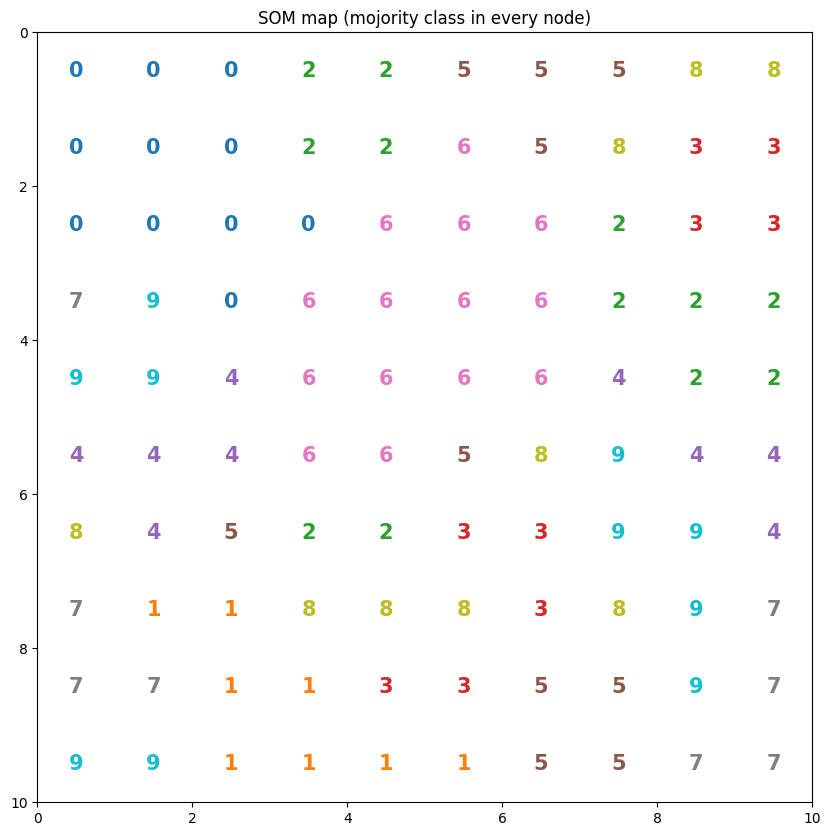

In [41]:
# Based on https://www.kaggle.com/code/abedi756/self-organizing-maps

from collections import defaultdict, Counter
cell_labels = defaultdict(list)
for lab, idx in zip(labels, predictions):
    cell_labels[idx].append(int(lab))

plt.figure(figsize=(10, 10))
for idx, labs in cell_labels.items():
    i, j = divmod(idx, n)
    maj = Counter(labs).most_common(1)[0][0]
    plt.text(j + 0.5, i + 0.5, str(maj),
             color=plt.cm.tab10(maj / 10.0),
             fontdict={'weight': 'bold', 'size': 15},
             ha='center', va='center')
plt.axis([0, n, 0, m])
plt.gca().invert_yaxis()
plt.title("SOM map (mojority class in every node)")
plt.show()

Analysis:

SOM stands for Self-Organizing Map. It is an unsupervised learning algorithm that arranges a set of weight vectors on a fixed 2D grid in such a way that the topology of the original high-dimensional data is preserved. In other words, nearby nodes in the grid represent similar data samples, while distant ones correspond to different types of samples. From the map above, we can see that this property mostly holds. The same digits usually appear in similar regions of the grid. However, one can see that this is not always the case. For instance, the digit 8 in the middle of the graph. However, in my opinion it still makes sense, as digit 8 can easily resemble digits 6, 9 or 3, depending on how it was written. And it's confidence is not too high.

Important information can also be provided by the confidence, which indicates how certain the given node is about the digit it represents. For my result it is plotted in the graph below.

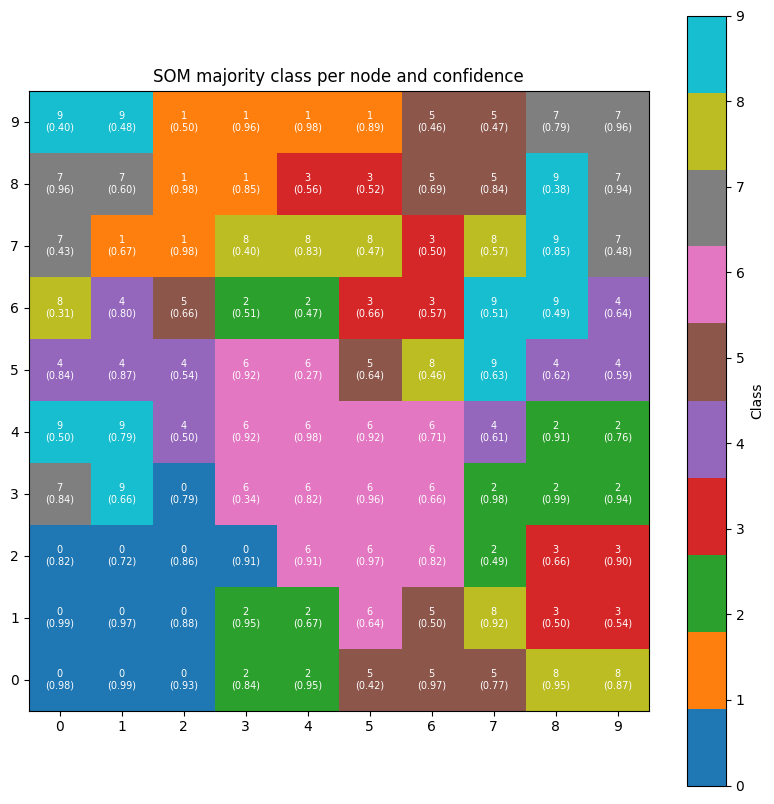

In [48]:
from collections import defaultdict, Counter
import numpy as np
import matplotlib.pyplot as plt

cell_labels = defaultdict(list)
for lab, idx in zip(labels, predictions):
    cell_labels[idx].append(int(lab))

majority = np.full((m, n), -1, dtype=int)
count = np.zeros((m, n), dtype=int)
confidence = np.zeros((m, n), dtype=float)

for idx, labs in cell_labels.items():
    i, j = divmod(idx, n)
    c = Counter(labs)
    maj, maj_count = c.most_common(1)[0] 
    total = sum(c.values())
    majority[i, j] = maj
    count[i, j] = total
    confidence[i, j] = maj_count / total 

plt.figure(figsize=(10, 10))
plt.imshow(majority, interpolation='nearest', cmap='tab10', vmin=0, vmax=9)
plt.title("SOM majority class per node and confidence")
plt.colorbar(ticks=range(10), label="Class")
plt.gca().invert_yaxis()
plt.xticks(range(n))
plt.yticks(range(m))

for i in range(m):
    for j in range(n):
        if majority[i, j] >= 0:
            plt.text(j, i,
                     f"{majority[i,j]}\n({confidence[i,j]:.2f})",
                     ha="center", va="center", fontsize=7, color="white")

plt.show()
